In [17]:
from math import *
import cmath
import numpy as np
from scipy.optimize import fsolve
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

print("Sucess!")
#print("Max drag force = %0.4f [N]" % torque)

Sucess!


In [18]:
# ---------- Problem 1 - Equivalent Impedences and Power ----------

V = 120         #[V]
f = 60          #[Hz]
omega = 2*pi*f  #[rad/s]
C = 0.531E-3    #[F]
L = 26.56E-3    #[H]
R2 = 5          #[Ohm]
R3 = 10         #[Ohm]

# Re = ((1+R2*omega**2*C**2)*(R3+omega**2*L**2)) / (C**2*L**2*R2*omega**4 + 2*C**2*R2*R3*omega**2+R3)
# print(Re)
# im = ((1+R2*omega**2*C**2)*(R3+omega**2*L**2)) / (omega*(C**2*L*R2*omega**2 - C*L**2*omega**2 - C*R3 + L))
# print(im)

# ----- Compute impedence and currents -----
z_tot = ((1/((1/((omega*C)*1j)) + R2)) + (1/((omega*L)*1j + R3)))**(-1)
print("z_tot: \t\t{:.2f}".format(z_tot))

I_source = V/z_tot
print("I_source: \t{:.4f}".format(I_source))

z2 = R2 + 1/((omega*C)*1j)
I_z2 = V/z2
print("\nI_z2: \t\t{:.4f}".format(I_z2))

z3 = R3 + (omega*L)*1j
I_z3 = V/z3
print("I_z3: \t\t{:.4f}".format(I_z3))

print("\nI_z2 + I_z3: \t{:.4f}".format(I_z2 + I_z3))

V = 120 + 0j
# ----- Compute power consumed by resistors -----
P_R2 = I_z2 * np.conj(I_z2) * R2
P_R3 = I_z3 * np.conj(I_z3) * R3
print("\nP_R2: \t\t{:.4f} \t[W]".format(P_R2.real))
print("P_R3: \t\t{:.4f} \t[W]".format(P_R3.real))
print("P_R2 + R_R3: \t{:.4f} \t[W]".format(P_R2.real + P_R3.real))

# ----- Compute real, reactive, apparent power -----
P_avg = V * I_source
print("\nP_avg: \t\t{:.4f} \t[W]".format(P_avg.real))
P_react = V * I_source
print("P_react: \t{:.4f} \t[VAr]".format(P_react.imag))
P_apparent = sqrt(P_avg.real**2 + P_react.imag**2)
print("P_apparent: \t{:.4f} \t[VA]".format(P_apparent))

PF = P_avg / P_apparent
print("PF: \t\t{:.4f} \t\t[ ]".format(PF.real))

z_tot: 		6.00-2.00j
I_source: 	18.0032+6.0000j

I_z2: 		12.0109+12.0000j
I_z3: 		5.9923-6.0000j

I_z2 + I_z3: 	18.0032+6.0000j

P_R2: 		1441.3118 	[W]
P_R3: 		719.0729 	[W]
P_R2 + R_R3: 	2160.3848 	[W]

P_avg: 		2160.3848 	[W]
P_react: 	720.0000 	[VAr]
P_apparent: 	2277.2050 	[VA]
PF: 		0.9487 		[ ]


In [19]:
# ---------- Problem 2 - Circuits with Transformer ----------
V = 120 + 0j
f = 60          #[Hz]
omega = 2*pi*f  #[rad/s]
C = 0.531E-3    #[F]
L = 26.56E-3    #[H]
R2 = 5          #[Ohm]
R3 = 10         #[Ohm]

k = 10 / 1

# ----- Compute impedence and currents -----
z2 = ((1/((omega*C)*1j)) + R2)
print("z_2: \t\t{:.2f}".format(z2))
z3 = (k**2) * ((omega*L)*1j + R3)
print("z_3: \t\t{:.2f}".format(z3))

z_tot = ((1/z2) + (1/z3))**(-1)
print("z_tot: \t\t{:.2f}".format(z_tot))

I1 = V/z_tot
print("\nI1: \t\t{:.4f}".format(I1))
I2 = V/z2
print("I2: \t\t{:.4f}".format(I2))
I3_p = V/z3
# I3 = ((1/k)*V) / (omega*L*1j + R3)
I3 = k*I3_p
print("I3_p: \t\t{:.4f}".format(I3_p))
print("I3: \t\t{:.4f}".format(I3))
print("I2 + I3': \t{:.4f}".format(I2 + I3_p))

# ----- Compute power consumed by resistors -----
P_R2 = I2 * np.conj(I2) * R2
P_R3 = I3_p * np.conj(I3_p) * (k**2 * R3)
print("\nP_R2: \t\t{:.4f} \t[W]".format(P_R2.real))
print("P_R3: \t\t{:.4f} \t\t[W]".format(P_R3.real))
print("P_R2 + R_R3: \t{:.4f} \t[W]".format(P_R2.real + P_R3.real))

# ----- Compute real, reactive, apparent power -----
P_avg = V * I1
print("\nP_avg: \t\t{:.4f} \t[W]".format(P_avg.real))
P_react = V * I1
print("P_react: \t{:.4f} \t[VAr]".format(P_react.imag))
P_apparent = sqrt(P_avg.real**2 + P_react.imag**2)
print("P_apparent: \t{:.4f} \t[VA]".format(P_apparent))

PF = P_avg / P_apparent
print("PF: \t\t{:.4f} \t\t[ ]".format(PF.real))


z_2: 		5.00-5.00j
z_3: 		1000.00+1001.29j
z_tot: 		5.02-4.97j

I1: 		12.0709+11.9400j
I2: 		12.0109+12.0000j
I3_p: 		0.0599-0.0600j
I3: 		0.5992-0.6000j
I2 + I3': 	12.0709+11.9400j

P_R2: 		1441.3118 	[W]
P_R3: 		7.1907 		[W]
P_R2 + R_R3: 	1448.5026 	[W]

P_avg: 		1448.5026 	[W]
P_react: 	1432.7994 	[VAr]
P_apparent: 	2037.4184 	[VA]
PF: 		0.7109 		[ ]


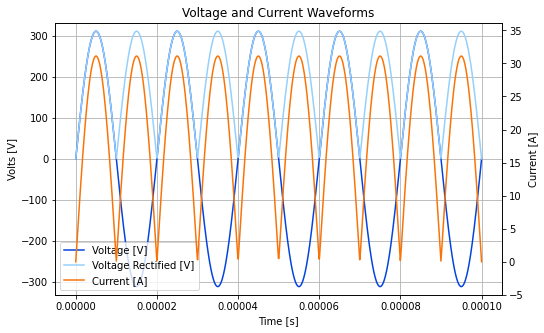

P_avg = 	4835.1600 	[W]

Vc_peak = 	311.1266 	[V]
Vc_avg = 	308.0461 	[V]
I_avg = 	30.8046 	[A]
Charge = 	0.0003 		[C]
Capacitance = 	50.0000 	[uF]
P_avg = 	9489.2423 	[W]


In [20]:
# ---------- Problem 3 - Rectifier Circuit ----------
Vpeak = 220 * sqrt(2) #[V]
f = 50E3 #[Hz]
T = 1/f #[s]
omega = 2*pi*f #[rad/s]
R = 10 #[Ohm]

# Set up figure
fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches
ax2 = host.twinx()

# Make the signals
tVal = np.linspace(0, 5*T, 1000)

voltSig = Vpeak * np.sin(omega * tVal)
series1, = host.plot(tVal, voltSig, "xkcd:blue", label="Voltage [V]")
rectSig = abs(voltSig)
series2, = host.plot(tVal, rectSig, "xkcd:light blue", label="Voltage Rectified [V]")

currentSig = rectSig / R
series3, = ax2.plot(tVal, currentSig, "xkcd:orange", label="Current [A]")

# Plot parameters
plt.title("Voltage and Current Waveforms")
host.set_xlabel("Time [s]")
host.set_ylabel("Volts [V]")
ax2.set_ylabel("Current [A]")

host.set_ylim([min(voltSig) - 20, max(voltSig) + 20])
ax2.set_ylim([min(currentSig - 5), max(currentSig + 5)])

host.grid(b=True, which='both', axis='both')
lns = [series1, series2, series3]
host.legend(handles=lns, loc='lower left')
plt.show()

# ----- Calculate Capacitance for 1% V_avg -----
# Compute average power
powerSig = rectSig * currentSig
print("P_avg = \t%0.4f \t[W]" % np.mean(powerSig))

Vc_peak = max(rectSig)
Vc_avg = Vc_peak / 1.01
print("\nVc_peak = \t%0.4f \t[V]" % Vc_peak)
print("Vc_avg = \t%0.4f \t[V]" % Vc_avg)

I_avg = Vc_avg / R
print("I_avg = \t%0.4f \t[A]" % I_avg)

charge = I_avg * (T/2) # Divide by two because full bridge rectifier increases frequency by 2
print("Charge = \t%0.4f \t\t[C]" % charge)

C = charge / (2/100 * Vc_avg)
print("Capacitance = \t%0.4f \t[uF]" % (C*1E6))

# Compute rectified average power
P_avg = Vc_avg * I_avg
print("P_avg = \t%0.4f \t[W]" % P_avg)

Omega_sync = 	125.6637 	[rad/s]
Omega_slip = 	3.7699 		[rad/s]
Omega_mech = 	121.8938 	[rad/s]
kt = 		26.5258 	[Nm/rad/s]
omega_motor = 	121.8938 	[rad/s]



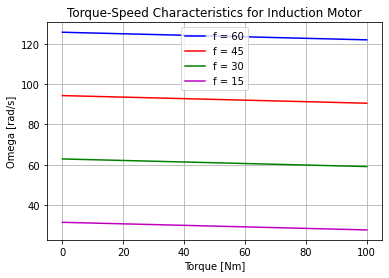

Vs_min = 	622.2540 	[V]
f_switch = 	1.2600 		[kHz]

Va_peak = 	155.5635 	[V]
omega_motor = 	60.9924 	[rad/s]


In [21]:
# ---------- Problem 4 - Induction Motor and V/F Drive ----------
f_rated = 60      #[Hz]
p = 6             #[poles]
s = 0.03          #[slip]
Tem_rated = 100   #[Nm]
Va_rated = 220    #[V]

omega_sync = (2*pi*f_rated) / (p/2)
omega_slip = s * omega_sync
omega_mech = omega_sync - omega_slip
print("Omega_sync = \t%0.4f \t[rad/s]" % omega_sync)
print("Omega_slip = \t%0.4f \t\t[rad/s]" % omega_slip)
print("Omega_mech = \t%0.4f \t[rad/s]" % omega_mech)

kt = (Tem_rated) / (s * ((2*pi*f_rated)/(p/2)))
print("kt = \t\t%0.4f \t[Nm/rad/s]" % kt)

omega_motor = ((2*pi*f_rated) / (p/2)) - (Tem_rated/kt)
print("omega_motor = \t%0.4f \t[rad/s]\n" % omega_motor)

# --- Plot the results for variable frequency ---
f = [f_rated, 45, 30, 15] #[Hz]
colours = ['b-', 'r-', 'g-', 'm-']

torque = np.linspace(0, 100, int(1E3))
omega = np.zeros(len(torque))

for outindex in range(len(f)):

  for i, T in enumerate(torque):
      omega[i] = (2*pi*f[outindex])/(p/2) - T/kt

  plt.plot(torque, omega, colours[outindex], label="f = {:.0f}".format(f[outindex]))

plt.title("Torque-Speed Characteristics for Induction Motor")
plt.xlabel("Torque [Nm]")
plt.ylabel("Omega [rad/s]")
#plt.ylim([10, 150])
#plt.xlim([min(torque), max(torque)])
plt.grid(True)
plt.legend(loc='upper center')
plt.show()

# Compute minimum supply voltage
Vs_min = 2*(Va_rated*sqrt(2))
print("Vs_min = \t%0.4f \t[V]" % Vs_min)

f_switch = 21*f_rated
print("f_switch = \t%0.4f \t\t[kHz]" % (f_switch/1000))

# Compute applied voltage and motor speed
f = 30
Va_peak = (Va_rated*sqrt(2))/(f_rated) * f
print("\nVa_peak = \t%0.4f \t[V]" % Va_peak)

# Set equation == 0 and solve with fsolve
fxn = lambda w: (2*pi*f)/(p/2) - (0.8*w)/kt - w
omega_motor = fsolve(fxn, 0.5)
print("omega_motor = \t%0.4f \t[rad/s]" % omega_motor)
